In [4]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from textblob.sentiments import PatternAnalyzer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from wordcloud import WordCloud, STOPWORDS
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Data

In [5]:
# Reading in data from source file
data = pd.read_csv('mbti_1.csv')

In [ ]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


Text(0.5, 1.0, 'Distribution of personality types in data')

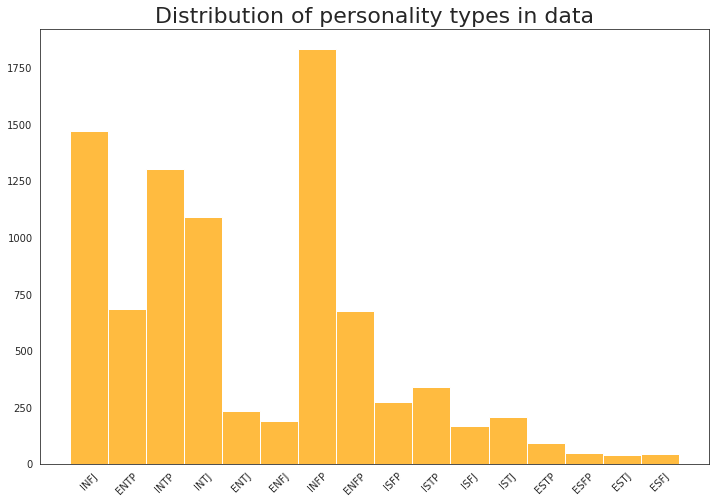

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data['type'], bins=16, color='orange')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of personality types in data', size=22)

Text(0.5, 0, '')

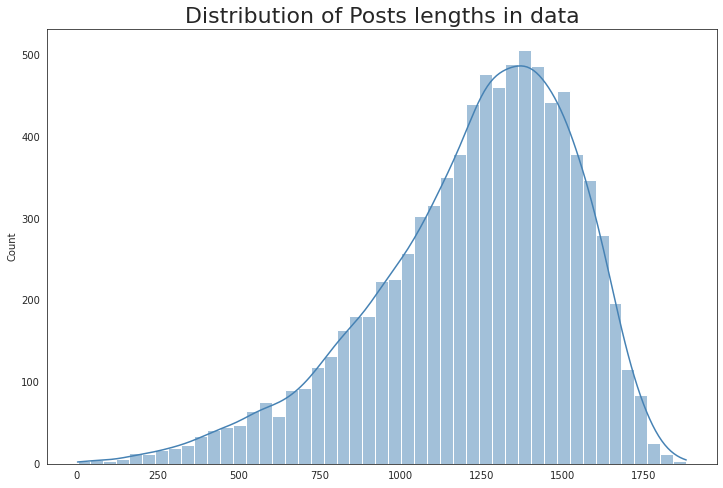

In [ ]:
# Counting words per comment
data['post_len'] = [len(a.split()) for a in data['posts']]
type_len = data.groupby('type').post_len.mean().reset_index()

# Distribution of Post lengths
plt.figure(figsize=(12,8))
sns.histplot(data['post_len'], kde=True, color='steelblue')
plt.title('Distribution of Posts lengths in data', size=22)
plt.xlabel('')

Text(0, 0.5, '')

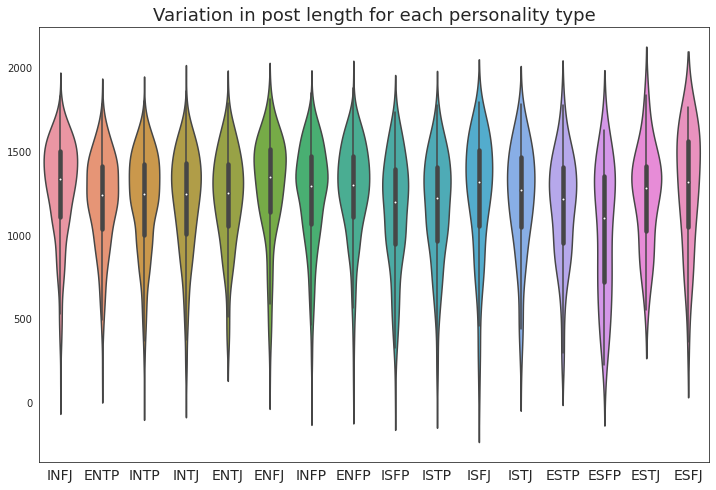

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x="type", 
               y="post_len", 
               data=data, dodge=False)
plt.title('Variation in post length for each personality type', size=18)
plt.xlabel('')
plt.xticks(size=14)
plt.ylabel('')

# Results

## Topic Modelling


In [ ]:
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser"])

def token_maker(text):
  lemmas = []
  for row in text:
    x = nlp(row)
    lemm = [token.lemma_ for token in x if (token.is_alpha == True and token.is_stop == False and len(token)> 3)]
    lemmas.append(lemm)
  return lemmas


In [ ]:
introverts = ['INTP','INFJ','INFP','INTJ','ISTP','ISFJ','ISFP','ISTJ']
Ixxx = data['posts'][data['type'].isin(introverts)]
Exxx = data['posts'][~data['type'].isin(introverts)]

sensing = ['ISTP','ISFJ','ISFP','ISTJ','ESTP','ESFJ','ESFP','ESTJ']
Sxxx = data['posts'][data['type'].isin(sensing)]
Nxxx = data['posts'][~data['type'].isin(sensing)]

feeling = ['INFJ','INFP','ISFJ','ISFP','ENFJ','ENFP','ESFJ','ESFP']
Fxxx = data['posts'][data['type'].isin(feeling)]
Txxx = data['posts'][~data['type'].isin(feeling)]

perceiving = ['INTP','INFP','ISTP','ISFP','ENTP','ENFP','ESTP','ESFP']
Pxxx = data['posts'][data['type'].isin(perceiving)]
Jxxx = data['posts'][~data['type'].isin(perceiving)]

In [ ]:
I_tokens = token_maker(Ixxx)
E_tokens = token_maker(Exxx)
S_tokens = token_maker(Sxxx)
N_tokens = token_maker(Nxxx)
F_tokens = token_maker(Fxxx)
T_tokens = token_maker(Txxx)
P_tokens = token_maker(Pxxx)
J_tokens = token_maker(Jxxx)

In [ ]:
def LDAtopic(tok):
  dictionary = Dictionary(tok)
  corpus = [dictionary.doc2bow(doc) for doc in tok]
  temp = dictionary[0]
  id2word = dictionary.id2token
  model = LdaModel(corpus, id2word=id2word, passes=50, num_topics=5, eta='auto', random_state=123)
  return model

In [ ]:
model = LDAtopic(I_tokens)
model.print_topics()

[(0,
  '0.021*"like" + 0.016*"think" + 0.012*"feel" + 0.012*"know" + 0.012*"people" + 0.010*"time" + 0.009*"thing" + 0.008*"want" + 0.008*"love" + 0.007*"friend"'),
 (1,
  '0.015*"think" + 0.015*"like" + 0.011*"people" + 0.009*"know" + 0.008*"thing" + 0.007*"time" + 0.006*"want" + 0.006*"feel" + 0.005*"find" + 0.005*"say"'),
 (2,
  '0.016*"like" + 0.015*"think" + 0.010*"people" + 0.009*"know" + 0.008*"time" + 0.007*"thing" + 0.006*"feel" + 0.006*"type" + 0.005*"want" + 0.005*"find"'),
 (3,
  '0.017*"like" + 0.015*"think" + 0.011*"people" + 0.010*"know" + 0.009*"time" + 0.008*"thing" + 0.007*"want" + 0.007*"feel" + 0.005*"find" + 0.005*"work"'),
 (4,
  '0.022*"think" + 0.019*"like" + 0.012*"people" + 0.012*"know" + 0.011*"type" + 0.010*"feel" + 0.009*"thing" + 0.008*"time" + 0.007*"want" + 0.006*"find"')]

In [ ]:
model = LDAtopic(E_tokens)
model.print_topics()

[(0,
  '0.019*"think" + 0.016*"like" + 0.012*"people" + 0.011*"know" + 0.009*"thing" + 0.008*"type" + 0.008*"time" + 0.007*"feel" + 0.006*"want" + 0.006*"find"'),
 (1,
  '0.017*"think" + 0.017*"like" + 0.011*"know" + 0.011*"people" + 0.008*"thing" + 0.008*"time" + 0.007*"type" + 0.007*"feel" + 0.006*"want" + 0.006*"friend"'),
 (2,
  '0.021*"like" + 0.018*"think" + 0.013*"know" + 0.012*"people" + 0.010*"feel" + 0.010*"thing" + 0.009*"time" + 0.008*"love" + 0.007*"friend" + 0.007*"want"'),
 (3,
  '0.019*"like" + 0.017*"think" + 0.012*"know" + 0.011*"people" + 0.008*"thing" + 0.008*"time" + 0.007*"type" + 0.007*"feel" + 0.007*"want" + 0.005*"friend"'),
 (4,
  '0.017*"like" + 0.017*"think" + 0.011*"people" + 0.011*"know" + 0.008*"thing" + 0.008*"feel" + 0.008*"time" + 0.007*"type" + 0.006*"want" + 0.005*"love"')]

In [ ]:
model = LDAtopic(S_tokens)
model.print_topics()

[(0,
  '0.017*"like" + 0.015*"think" + 0.010*"know" + 0.010*"people" + 0.009*"thing" + 0.009*"time" + 0.007*"type" + 0.007*"feel" + 0.007*"want" + 0.005*"good"'),
 (1,
  '0.019*"like" + 0.019*"think" + 0.011*"people" + 0.011*"know" + 0.009*"type" + 0.008*"thing" + 0.008*"time" + 0.008*"feel" + 0.006*"want" + 0.006*"love"'),
 (2,
  '0.021*"like" + 0.018*"think" + 0.012*"know" + 0.012*"people" + 0.010*"thing" + 0.009*"time" + 0.009*"feel" + 0.008*"want" + 0.007*"friend" + 0.007*"type"'),
 (3,
  '0.018*"like" + 0.015*"think" + 0.010*"know" + 0.010*"people" + 0.008*"time" + 0.008*"thing" + 0.007*"type" + 0.007*"feel" + 0.007*"want" + 0.005*"go"'),
 (4,
  '0.017*"like" + 0.014*"think" + 0.010*"people" + 0.010*"know" + 0.008*"time" + 0.008*"thing" + 0.008*"type" + 0.007*"feel" + 0.007*"want" + 0.005*"go"')]

In [ ]:
model = LDAtopic(N_tokens)
model.print_topics()

[(0,
  '0.021*"like" + 0.020*"think" + 0.015*"feel" + 0.014*"people" + 0.014*"know" + 0.011*"thing" + 0.010*"time" + 0.009*"want" + 0.008*"love" + 0.008*"friend"'),
 (1,
  '0.016*"think" + 0.014*"like" + 0.011*"people" + 0.009*"know" + 0.008*"thing" + 0.007*"time" + 0.006*"type" + 0.005*"feel" + 0.005*"want" + 0.005*"find"'),
 (2,
  '0.022*"think" + 0.019*"like" + 0.014*"type" + 0.012*"know" + 0.011*"people" + 0.008*"thing" + 0.007*"feel" + 0.007*"time" + 0.006*"want" + 0.006*"INFJ"'),
 (3,
  '0.018*"like" + 0.014*"think" + 0.010*"know" + 0.010*"people" + 0.008*"time" + 0.007*"thing" + 0.007*"feel" + 0.007*"want" + 0.007*"love" + 0.005*"good"'),
 (4,
  '0.018*"like" + 0.016*"think" + 0.011*"people" + 0.010*"know" + 0.009*"time" + 0.008*"thing" + 0.008*"feel" + 0.006*"want" + 0.006*"go" + 0.005*"love"')]

In [ ]:
model = LDAtopic(F_tokens)
model.print_topics()

[(0,
  '0.023*"like" + 0.018*"think" + 0.014*"know" + 0.013*"feel" + 0.012*"people" + 0.010*"thing" + 0.010*"time" + 0.009*"love" + 0.008*"want" + 0.008*"friend"'),
 (1,
  '0.022*"think" + 0.018*"like" + 0.012*"people" + 0.012*"know" + 0.011*"type" + 0.010*"feel" + 0.009*"thing" + 0.008*"time" + 0.006*"want" + 0.006*"love"'),
 (2,
  '0.018*"like" + 0.018*"think" + 0.013*"people" + 0.013*"feel" + 0.011*"know" + 0.010*"thing" + 0.009*"time" + 0.008*"want" + 0.007*"love" + 0.006*"find"'),
 (3,
  '0.018*"like" + 0.016*"think" + 0.010*"know" + 0.010*"people" + 0.009*"feel" + 0.009*"time" + 0.008*"thing" + 0.007*"love" + 0.006*"want" + 0.006*"friend"'),
 (4,
  '0.017*"like" + 0.016*"think" + 0.011*"people" + 0.011*"know" + 0.009*"feel" + 0.008*"thing" + 0.008*"time" + 0.006*"want" + 0.006*"love" + 0.005*"find"')]

In [ ]:
model = LDAtopic(T_tokens)
model.print_topics()

[(0,
  '0.016*"like" + 0.016*"think" + 0.011*"people" + 0.010*"know" + 0.008*"time" + 0.008*"thing" + 0.006*"want" + 0.006*"feel" + 0.005*"find" + 0.005*"go"'),
 (1,
  '0.017*"like" + 0.015*"think" + 0.010*"people" + 0.010*"know" + 0.008*"time" + 0.008*"thing" + 0.006*"want" + 0.006*"feel" + 0.006*"type" + 0.005*"find"'),
 (2,
  '0.016*"like" + 0.015*"think" + 0.011*"people" + 0.010*"know" + 0.008*"time" + 0.008*"thing" + 0.007*"want" + 0.007*"feel" + 0.005*"find" + 0.005*"go"'),
 (3,
  '0.020*"like" + 0.019*"think" + 0.013*"people" + 0.012*"know" + 0.009*"thing" + 0.009*"time" + 0.008*"feel" + 0.007*"want" + 0.006*"friend" + 0.006*"find"'),
 (4,
  '0.018*"think" + 0.016*"like" + 0.011*"people" + 0.010*"know" + 0.010*"type" + 0.008*"thing" + 0.007*"time" + 0.006*"feel" + 0.006*"want" + 0.005*"find"')]

In [ ]:
model = LDAtopic(P_tokens)
model.print_topics()

[(0,
  '0.017*"like" + 0.016*"think" + 0.011*"people" + 0.010*"know" + 0.008*"time" + 0.008*"thing" + 0.006*"feel" + 0.006*"want" + 0.005*"go" + 0.005*"good"'),
 (1,
  '0.020*"think" + 0.017*"like" + 0.012*"people" + 0.011*"know" + 0.009*"thing" + 0.009*"type" + 0.008*"feel" + 0.008*"time" + 0.006*"want" + 0.006*"find"'),
 (2,
  '0.019*"like" + 0.017*"think" + 0.012*"feel" + 0.012*"people" + 0.011*"know" + 0.010*"time" + 0.009*"thing" + 0.008*"want" + 0.008*"love" + 0.006*"friend"'),
 (3,
  '0.023*"like" + 0.019*"think" + 0.013*"know" + 0.012*"people" + 0.010*"feel" + 0.009*"thing" + 0.009*"time" + 0.009*"friend" + 0.008*"love" + 0.007*"want"'),
 (4,
  '0.018*"think" + 0.018*"like" + 0.011*"know" + 0.010*"people" + 0.008*"type" + 0.008*"feel" + 0.008*"thing" + 0.008*"time" + 0.006*"want" + 0.006*"love"')]

In [ ]:
model = LDAtopic(J_tokens)
model.print_topics()

[(0,
  '0.018*"like" + 0.018*"think" + 0.013*"people" + 0.012*"know" + 0.011*"feel" + 0.010*"thing" + 0.009*"time" + 0.007*"want" + 0.007*"friend" + 0.006*"find"'),
 (1,
  '0.018*"like" + 0.016*"think" + 0.012*"people" + 0.011*"know" + 0.009*"time" + 0.009*"feel" + 0.009*"thing" + 0.007*"want" + 0.006*"love" + 0.006*"friend"'),
 (2,
  '0.019*"think" + 0.017*"like" + 0.011*"people" + 0.011*"know" + 0.010*"type" + 0.008*"thing" + 0.008*"feel" + 0.007*"time" + 0.006*"want" + 0.005*"find"'),
 (3,
  '0.019*"like" + 0.017*"think" + 0.012*"know" + 0.012*"people" + 0.009*"feel" + 0.008*"time" + 0.008*"thing" + 0.007*"want" + 0.006*"type" + 0.006*"find"'),
 (4,
  '0.017*"like" + 0.017*"think" + 0.011*"know" + 0.011*"people" + 0.008*"thing" + 0.008*"feel" + 0.008*"time" + 0.006*"want" + 0.006*"type" + 0.006*"love"')]

In [ ]:
def token2text(tok):
  text = ''
  for l in tok:
    joined = ' '.join(l)
    text += ''.join(joined)
  return(text)

I_text = token2text(I_tokens)
E_text = token2text(E_tokens)
S_text = token2text(N_tokens)
N_text = token2text(N_tokens)
F_text = token2text(F_tokens)
T_text = token2text(T_tokens)
P_text = token2text(P_tokens)
J_text = token2text(J_tokens)

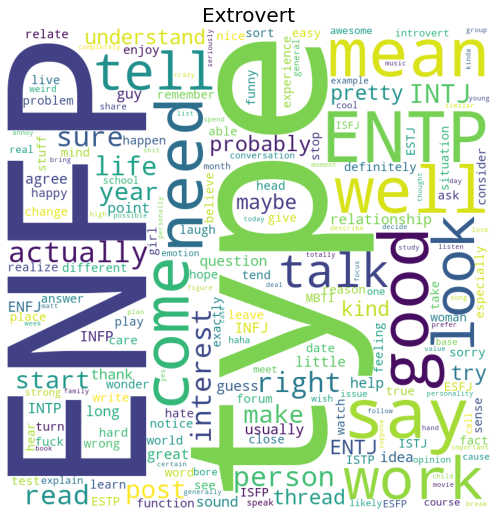

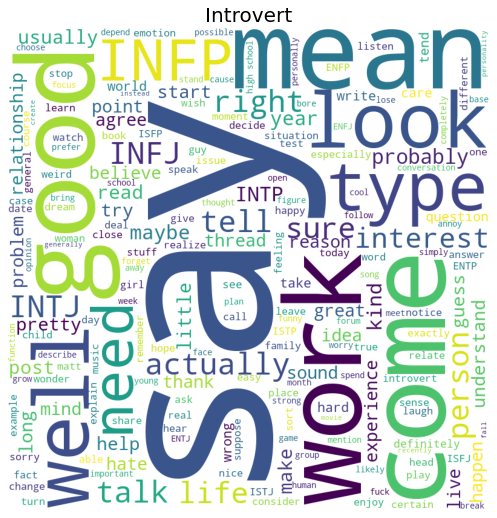

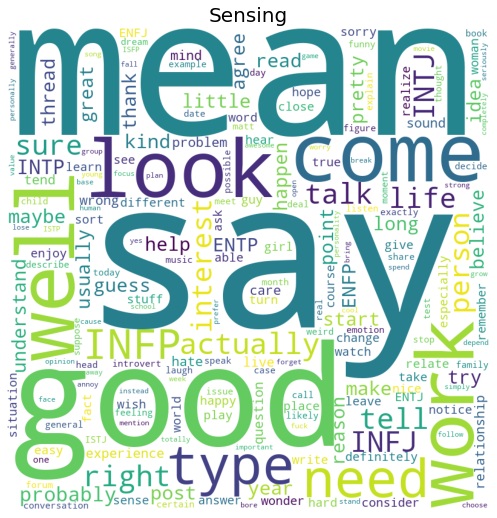

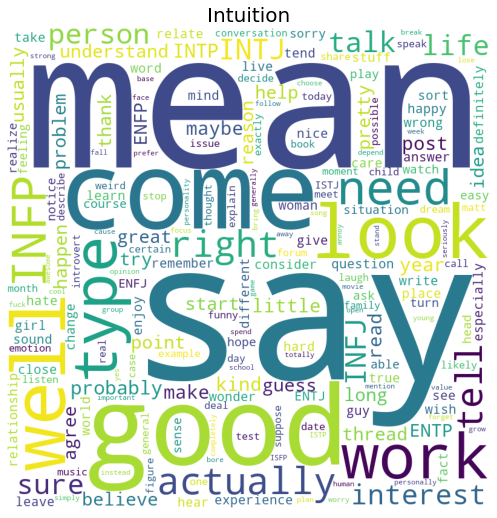

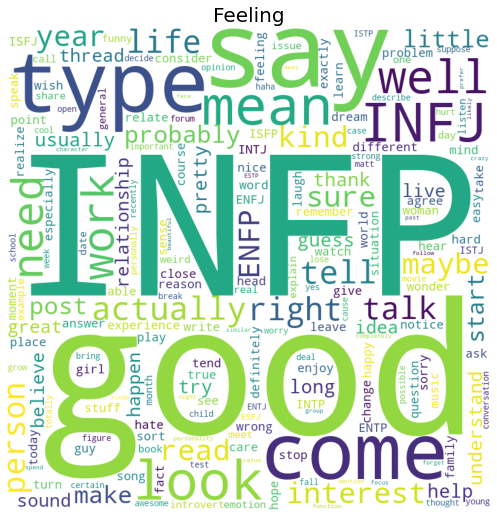

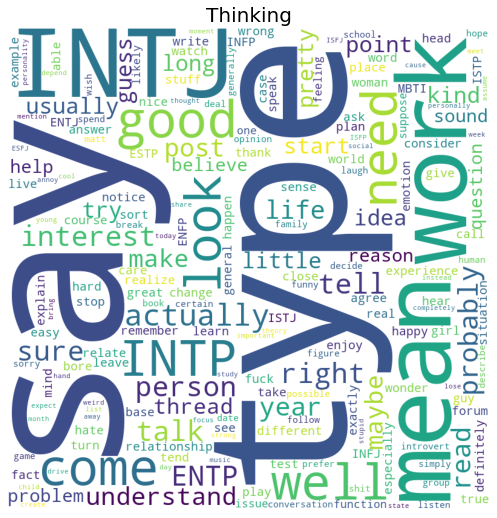

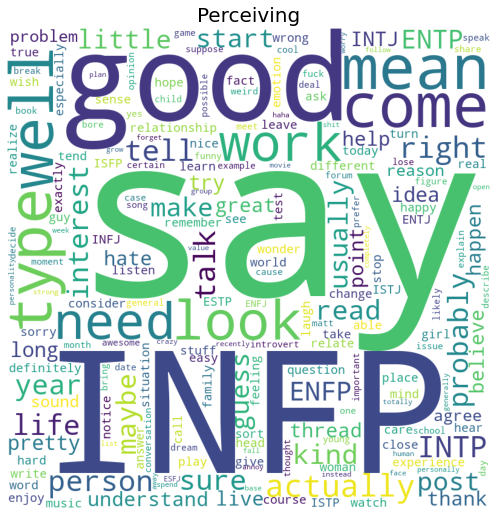

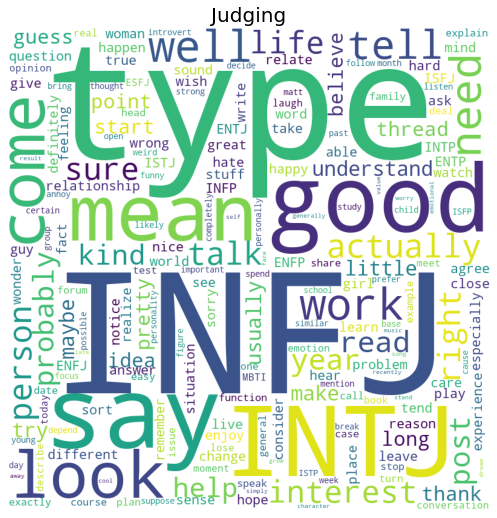

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(['want','love','know', 'people', 
                  'think', 'feel', 'thing', 'like',
                  'time','friend','find','go'])



def WC(stp,text,title):
  wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        stopwords = stopwords,
                        min_font_size = 10).generate(text) 
                         
  plt.figure(figsize = (7, 7), facecolor = None) 
  plt.imshow(wordcloud)
  plt.title(title, size=20) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show() 


WC(stopwords, E_text, 'Extrovert')
WC(stopwords, I_text, 'Introvert')
WC(stopwords, S_text, 'Sensing')
WC(stopwords, N_text, 'Intuition')
WC(stopwords, F_text, 'Feeling')
WC(stopwords, T_text, 'Thinking')
WC(stopwords, P_text, 'Perceiving')
WC(stopwords, J_text, 'Judging')

## Sentiments


In [ ]:
pols = []
subj = []
for row in data['posts']:
  blob = TextBlob(row, analyzer=PatternAnalyzer())
  pols.append(blob.sentiment.polarity)
  subj.append(blob.sentiment.subjectivity)

Text(0, 0.5, '')

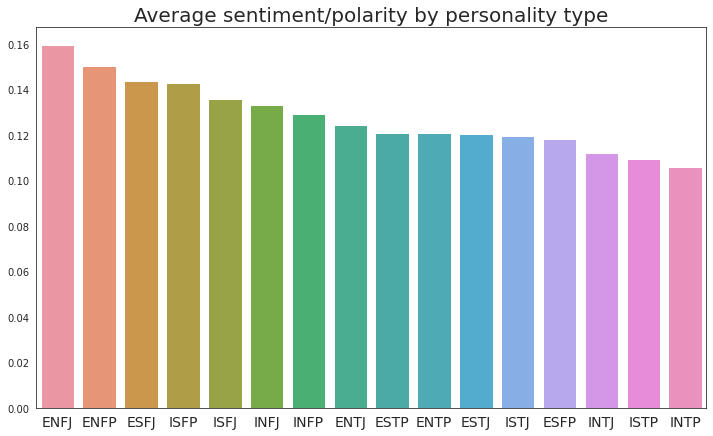

In [ ]:
data['sentiment'] = pd.Series(pols)

type_sentiment = data.groupby('type')['sentiment'].mean().reset_index()
type_sentiment = type_sentiment.sort_values(by='sentiment', ascending=False)


plt.figure(figsize=(12,7))
sns.set_style('white')
sns.barplot(x='type', y='sentiment', data=type_sentiment)
plt.title('Average sentiment/polarity by personality type', size=20)
plt.xlabel('')
plt.xticks(size=14)
plt.ylabel('')

In [ ]:
!python -m textblob.download_corpora

## Vectorization


In [6]:
# Dividing data into train/test/validation (60/20/20)
X_train, X_test, y_train, y_test = train_test_split(data['posts'], 
                                            data['type'], 
                                            test_size=0.4, 
                                            random_state=123)

X_test, X_val, y_test, y_val = train_test_split(X_test, 
                                            y_test, 
                                            test_size=0.5, 
                                            random_state=123)

In [7]:
# Defining custom tokenizer using SpaCy
nlp = spacy.load("en_core_web_sm")
custom_stopwords = [i.lower() for i in set(data['type'])]

for stp in custom_stopwords:
  lexeme = nlp.vocab[stp]
  lexeme.is_stop = True

def spacy_tokenizer(text):
  x = nlp(text)
  lemmas = [token.lemma_ for token in x if (token.is_alpha == True and token.is_stop == False)]
  return lemmas

# Set three variations of vectorizers
tfidf_spacy = CountVectorizer(tokenizer=spacy_tokenizer)
tfidf = TfidfVectorizer(stop_words='english')
CVect = CountVectorizer(stop_words='english')

In [8]:
# Performing a Naive Bayes classification on all three vector representations

NB = MultinomialNB()
pipe = Pipeline([('Count', CVect), ('MNB', NB)])
fitted = pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        40
        ENFP       0.00      0.00      0.00       146
        ENTJ       0.00      0.00      0.00        57
        ENTP       0.29      0.02      0.03       128
        ESFJ       0.00      0.00      0.00         8
        ESFP       0.00      0.00      0.00         6
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        14
        INFJ       0.35      0.63      0.45       281
        INFP       0.35      0.88      0.50       372
        INTJ       0.74      0.10      0.17       202
        INTP       0.51      0.45      0.48       288
        ISFJ       0.00      0.00      0.00        32
        ISFP       0.00      0.00      0.00        43
        ISTJ       0.00      0.00      0.00        45
        ISTP       0.00      0.00      0.00        65

    accuracy                           0.38      1735
   macro avg       0.14   

In [10]:
pipe = Pipeline([('Count', tfidf), ('MNB', NB)])
fitted = pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        40
        ENFP       0.00      0.00      0.00       146
        ENTJ       0.00      0.00      0.00        57
        ENTP       0.00      0.00      0.00       128
        ESFJ       0.00      0.00      0.00         8
        ESFP       0.00      0.00      0.00         6
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        14
        INFJ       0.31      0.01      0.03       281
        INFP       0.21      0.99      0.35       372
        INTJ       0.00      0.00      0.00       202
        INTP       0.00      0.00      0.00       288
        ISFJ       0.00      0.00      0.00        32
        ISFP       0.00      0.00      0.00        43
        ISTJ       0.00      0.00      0.00        45
        ISTP       0.00      0.00      0.00        65

    accuracy                           0.22      1735
   macro avg       0.03   

In [11]:
pipe = Pipeline([('Count', tfidf_spacy), ('MNB', NB)])
fitted = pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        40
        ENFP       0.00      0.00      0.00       146
        ENTJ       0.00      0.00      0.00        57
        ENTP       0.10      0.01      0.01       128
        ESFJ       0.00      0.00      0.00         8
        ESFP       0.00      0.00      0.00         6
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        14
        INFJ       0.30      0.53      0.38       281
        INFP       0.33      0.78      0.46       372
        INTJ       0.48      0.12      0.19       202
        INTP       0.46      0.48      0.47       288
        ISFJ       0.00      0.00      0.00        32
        ISFP       1.00      0.02      0.05        43
        ISTJ       0.00      0.00      0.00        45
        ISTP       0.00      0.00      0.00        65

    accuracy                           0.35      1735
   macro avg       0.17   

In [12]:
X_tr_count = CVect.fit_transform(X_train)
X_val_count = CVect.transform(X_val)
X_test_count = CVect.transform(X_test)

## Resampling

In [13]:
RandUnderSampled = RandomUnderSampler(sampling_strategy='auto', random_state=123)
under_X, under_y = RandUnderSampled.fit_resample(X_tr_count, y_train)

under_fitted = NB.fit(under_X, under_y)
under_pred = NB.predict(X_val_count)
print(classification_report(y_val, under_pred))

              precision    recall  f1-score   support

        ENFJ       0.05      0.48      0.09        42
        ENFP       0.26      0.17      0.21       138
        ENTJ       0.35      0.17      0.23        40
        ENTP       0.22      0.46      0.30       129
        ESFJ       0.03      0.89      0.06         9
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.05      0.33      0.08         9
        ESTP       0.07      0.07      0.07        14
        INFJ       0.54      0.07      0.13       272
        INFP       0.40      0.13      0.19       382
        INTJ       0.65      0.11      0.18       244
        INTP       0.58      0.04      0.08       251
        ISFJ       0.10      0.36      0.16        33
        ISFP       0.07      0.02      0.03        52
        ISTJ       0.12      0.63      0.19        35
        ISTP       0.40      0.33      0.36        76

    accuracy                           0.17      1735
   macro avg       0.24   

In [14]:
RandOverSampled = RandomOverSampler(sampling_strategy='not majority', 
                                    random_state=123)
over_X, over_y = RandOverSampled.fit_resample(X_tr_count, y_train)


over_fitted = NB.fit(over_X, over_y)
over_pred = NB.predict(X_val_count)
print(classification_report(y_val, over_pred))

              precision    recall  f1-score   support

        ENFJ       0.50      0.12      0.19        42
        ENFP       0.37      0.38      0.37       138
        ENTJ       0.33      0.12      0.18        40
        ENTP       0.50      0.47      0.48       129
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.00      0.00      0.00         9
        ESTP       1.00      0.07      0.13        14
        INFJ       0.43      0.65      0.52       272
        INFP       0.53      0.72      0.61       382
        INTJ       0.62      0.47      0.54       244
        INTP       0.48      0.53      0.50       251
        ISFJ       0.40      0.06      0.11        33
        ISFP       0.17      0.06      0.09        52
        ISTJ       1.00      0.03      0.06        35
        ISTP       0.67      0.21      0.32        76

    accuracy                           0.49      1735
   macro avg       0.44   

In [ ]:
smote = SMOTE(sampling_strategy='not majority', random_state=123)
smote_X, smote_y = smote.fit_resample(X_tr_count, y_train)

smote_fit = NB.fit(smote_X, smote_y)
smote_pred = NB.predict(X_val_count)
print(classification_report(y_val, smote_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        42
        ENFP       0.55      0.08      0.14       138
        ENTJ       0.00      0.00      0.00        40
        ENTP       0.69      0.14      0.23       129
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.00      0.00      0.00         9
        ESTP       0.00      0.00      0.00        14
        INFJ       0.31      0.64      0.42       272
        INFP       0.41      0.81      0.55       382
        INTJ       0.80      0.30      0.44       244
        INTP       0.47      0.51      0.49       251
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.00      0.00      0.00        52
        ISTJ       0.00      0.00      0.00        35
        ISTP       0.00      0.00      0.00        76

    accuracy                           0.41      1735
   macro avg       0.20   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Classifier


In [ ]:
RF = RandomForestClassifier(max_depth=2, random_state=123)
fitRF = RF.fit(over_X, over_y)
predRF = RF.predict(X_val_count)
print(classification_report(y_val, predRF))

              precision    recall  f1-score   support

        ENFJ       0.40      0.50      0.44        42
        ENFP       0.47      0.53      0.50       138
        ENTJ       0.00      0.00      0.00        40
        ENTP       0.00      0.00      0.00       129
        ESFJ       0.03      0.56      0.07         9
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.00      0.00      0.00         9
        ESTP       0.00      0.00      0.00        14
        INFJ       0.67      0.01      0.03       272
        INFP       0.62      0.48      0.54       382
        INTJ       0.59      0.45      0.51       244
        INTP       0.51      0.35      0.42       251
        ISFJ       0.35      0.58      0.43        33
        ISFP       0.55      0.31      0.40        52
        ISTJ       0.04      0.43      0.07        35
        ISTP       0.36      0.45      0.40        76

    accuracy                           0.33      1735
   macro avg       0.29   

In [ ]:
pipeline_RF = Pipeline([
                         ('vectorizer', CVect) ,             
                         ('RF' , RandomForestClassifier())
                        ])

hyperPara_RF = {
                'vectorizer__stop_words': ['english'],
                'RF__n_estimators': [100,200,300],
                'RF__criterion': ['gini','entropy'],
                'RF__min_samples_split': [2,10,30],
                'RF__min_samples_leaf': [1,3,10],
                'RF__ccp_alpha': [0,0.3,0.6],
                'RF__n_jobs': [4],
                'RF__verbose': [1]
             }

grid_RF = GridSearchCV(pipeline_RF, param_grid = hyperPara_RF, cv =5 )

In [ ]:
grid_RF.fit(X_train, y_train)
#grid_RF.best_params_

In [17]:
RF_best = RandomForestClassifier(criterion='gini',
                                 min_samples_leaf=3,
                                 min_samples_split=30,
                                 n_estimators=200,
                                 ccp_alpha=0,
                                 random_state=123)
RF_bestfit = RF_best.fit(over_X, over_y)
RF_bestpred = RF_best.predict(X_val_count)
print(classification_report(y_val, RF_bestpred))

              precision    recall  f1-score   support

        ENFJ       0.74      0.33      0.46        42
        ENFP       0.61      0.53      0.57       138
        ENTJ       0.67      0.60      0.63        40
        ENTP       0.63      0.71      0.67       129
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.00      0.00      0.00         9
        ESTP       0.67      0.14      0.24        14
        INFJ       0.65      0.69      0.67       272
        INFP       0.64      0.81      0.72       382
        INTJ       0.66      0.62      0.64       244
        INTP       0.70      0.73      0.72       251
        ISFJ       0.71      0.52      0.60        33
        ISFP       0.62      0.38      0.48        52
        ISTJ       0.76      0.54      0.63        35
        ISTP       0.70      0.59      0.64        76

    accuracy                           0.66      1735
   macro avg       0.55   

In [ ]:
print(f"Random Forest perfermance on train data : {RF_best.score(X_tr_count, y_train)} \n")
print(f"Random Forest perfermance on test data : {RF_best.score(X_test_count, y_test)}")


Random Forest perfermance on train data : 0.9771373679154659 

Random Forest perfermance on test data : 0.6288184438040346


In [ ]:
svc = SVC(random_state=123)
fitSVC = svc.fit(over_X, over_y)
predSVC = svc.predict(X_val_count)
print(classification_report(y_val, predSVC))

              precision    recall  f1-score   support

        ENFJ       0.70      0.38      0.49        42
        ENFP       0.70      0.56      0.62       138
        ENTJ       0.63      0.47      0.54        40
        ENTP       0.69      0.67      0.68       129
        ESFJ       1.00      0.11      0.20         9
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.00      0.00      0.00         9
        ESTP       0.55      0.43      0.48        14
        INFJ       0.62      0.68      0.65       272
        INFP       0.67      0.81      0.74       382
        INTJ       0.61      0.70      0.65       244
        INTP       0.69      0.72      0.70       251
        ISFJ       0.74      0.42      0.54        33
        ISFP       0.68      0.50      0.58        52
        ISTJ       0.90      0.51      0.65        35
        ISTP       0.69      0.49      0.57        76

    accuracy                           0.66      1735
   macro avg       0.62   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svc = SVC(random_state=123)

pipeline_SVC = Pipeline([
                         ('vectorizer', CVect) ,             
                         ('SVC' , SVC())
                        ])

hyperPara_SVC = {
                'SVC__C': [0.1,1,10],
                'SVC__kernel': ['rbf','sigmoid']
             }

grid_SVC = GridSearchCV(pipeline_SVC, param_grid = hyperPara_SVC, cv =5 )

In [ ]:
grid_SVC.fit(X_train, y_train)
grid_SVC.best_params_

{'SVC__C': 10, 'SVC__kernel': 'rbf'}

In [ ]:
svc = SVC(C=5, kernel='rbf', random_state=123)
fitSVC_best = svc.fit(over_X, over_y)
predSVC_best = svc.predict(X_val_count)
print(classification_report(y_val, predSVC_best))

              precision    recall  f1-score   support

        ENFJ       0.71      0.36      0.48        42
        ENFP       0.69      0.51      0.59       138
        ENTJ       0.63      0.42      0.51        40
        ENTP       0.67      0.64      0.66       129
        ESFJ       1.00      0.11      0.20         9
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.00      0.00      0.00         9
        ESTP       0.55      0.43      0.48        14
        INFJ       0.59      0.69      0.64       272
        INFP       0.66      0.81      0.73       382
        INTJ       0.65      0.70      0.67       244
        INTP       0.66      0.72      0.69       251
        ISFJ       0.72      0.39      0.51        33
        ISFP       0.75      0.46      0.57        52
        ISTJ       0.89      0.46      0.60        35
        ISTP       0.68      0.45      0.54        76

    accuracy                           0.65      1735
   macro avg       0.61   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Support Vector Classifier perfermance on train data : {svc.score(X_tr_count, y_train)} \n")
print(f"Support Vector Classifier perfermance on test data : {svc.score(X_test_count, y_test)}")


Support Vector Classifier perfermance on train data : 0.9996157540826128 

Support Vector Classifier perfermance on test data : 0.6420749279538905


In [19]:
logi = LogisticRegression(random_state=123)
fitlogi = logi.fit(over_X, over_y)
predlogi = logi.predict(X_val_count)
print(classification_report(y_val, predlogi))

              precision    recall  f1-score   support

        ENFJ       0.48      0.31      0.38        42
        ENFP       0.64      0.54      0.59       138
        ENTJ       0.50      0.50      0.50        40
        ENTP       0.68      0.65      0.66       129
        ESFJ       0.75      0.33      0.46         9
        ESFP       0.00      0.00      0.00         9
        ESTJ       0.75      0.33      0.46         9
        ESTP       0.53      0.57      0.55        14
        INFJ       0.59      0.63      0.61       272
        INFP       0.72      0.78      0.75       382
        INTJ       0.66      0.67      0.67       244
        INTP       0.67      0.67      0.67       251
        ISFJ       0.56      0.45      0.50        33
        ISFP       0.49      0.58      0.53        52
        ISTJ       0.51      0.54      0.53        35
        ISTP       0.59      0.55      0.57        76

    accuracy                           0.64      1735
   macro avg       0.57   

In [ ]:
pipeline_logi2 = Pipeline([
                         ('Count', CVect),             
                         ('Logistic' , LogisticRegression())
                        ])

hyperPara_logi2 = {
                'Count__stop_words': ['english'],
                'Logistic__penalty': ['l2','elasticnet'],
                'Logistic__C': [0,1,10],
                'Logistic__solver': ['newton-cg','lbfgs','saga'],
                'Logistic__verbose': [1],
                'Logistic__n_jobs': [4]
             }

grid_logi2 = GridSearchCV(pipeline_logi2, param_grid = hyperPara_logi2, cv =5)

In [ ]:
grid_logi2.fit(X_train, y_train)
#grid_logi2.best_params_

In [20]:
logi_best = LogisticRegression(C=10, n_jobs=4, penalty='l2', solver='saga')
fitlogi_best = logi_best.fit(over_X, over_y)
predlogi_best = logi_best.predict(X_test_count)
print(classification_report(y_test, predlogi_best))

              precision    recall  f1-score   support

        ENFJ       0.63      0.42      0.51        40
        ENFP       0.63      0.63      0.63       146
        ENTJ       0.67      0.54      0.60        57
        ENTP       0.56      0.65      0.60       128
        ESFJ       0.67      0.25      0.36         8
        ESFP       0.20      0.17      0.18         6
        ESTJ       0.75      0.38      0.50         8
        ESTP       0.44      0.29      0.35        14
        INFJ       0.63      0.69      0.66       281
        INFP       0.68      0.73      0.70       372
        INTJ       0.67      0.68      0.68       202
        INTP       0.70      0.70      0.70       288
        ISFJ       0.56      0.47      0.51        32
        ISFP       0.50      0.30      0.38        43
        ISTJ       0.71      0.60      0.65        45
        ISTP       0.57      0.54      0.56        65

    accuracy                           0.65      1735
   macro avg       0.60   

In [ ]:
print(f"Logistic Regression Classifier perfermance on train data : {logi_best.score(X_tr_count, y_train)} \n")
print(f"Logistic Regression Classifier perfermance on test data : {logi_best.score(X_test_count, y_test)}")

Logistic Regression Classifier perfermance on train data : 0.9790585975024015 

Logistic Regression Classifier perfermance on test data : 0.6495677233429394


## Personality type prediction using Twitter data


In [15]:
trump = pd.read_csv('realdonaldtrump.csv')
content = trump['content']
content = content.str.cat(sep=', ')
content = pd.Series(content)
trumpvec = CVect.transform(content)

In [18]:
pred = RF_best.predict(trumpvec)
pred

array(['ESTJ'], dtype=object)